In [674]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from trunk_filter.composite_filter import NonCausalTrunkFilter
from trunk_filter.utils import integrate_positions_from_velocity, get_data_array_from_dataframe, get_dataframe_from_data_array

In [675]:
df = pd.read_csv('../data/real/long-35-0-1/test/4/raw/data.csv')
df1 = pd.read_csv('../data/real/long-35-0-1/test/4/raw/data.csv')
index = 2

In [676]:
start = int(000)
delta = 300000
df = df.iloc[start:start+delta]
df1 = df1[start:start+delta]

print(len(df), len(df1))


498 498


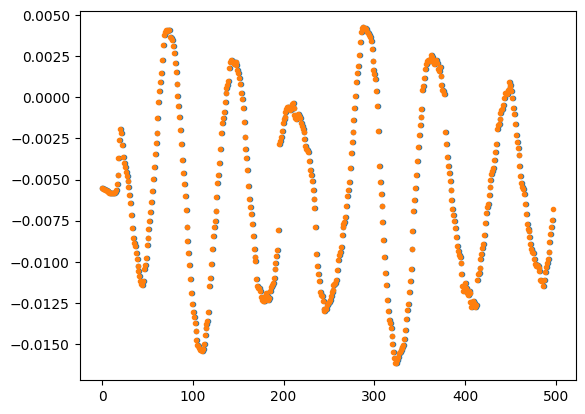

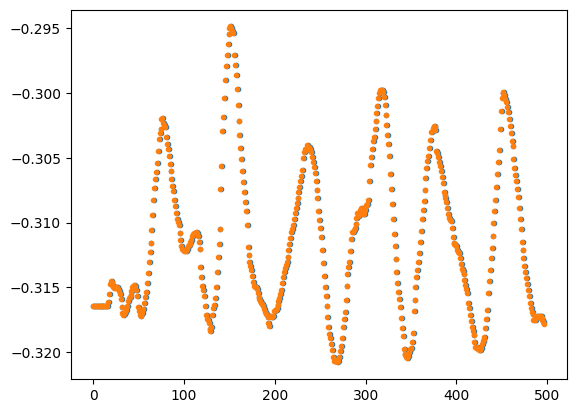

In [677]:
plt.plot(df[f'x{index}'], label='x3', linestyle='None', marker='.')
plt.plot(df1[f'x{index}_new'], label='x3 (mass 10g)', linestyle='None', marker='.')


plt.figure()
plt.plot(df['z4'], label='y3', linestyle='None', marker='.')
plt.plot(df1['z4_new'], label='y3 (mass 10g)', linestyle='None', marker='.')


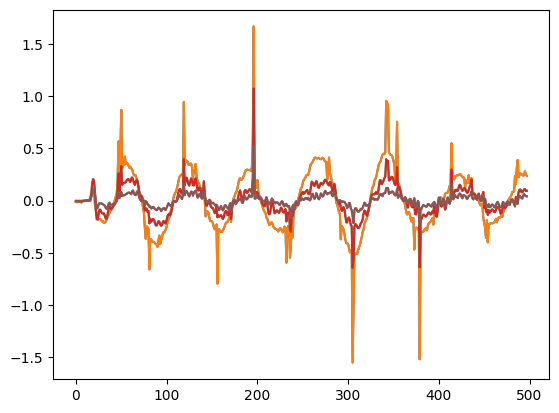

In [678]:
index = 4
plt.plot(df[f'vx{index}'], label='x3')
plt.plot(df1[f'vx{index}'], label='x3 (mass 100g)')

index = 3
plt.plot(df[f'vx{index}'], label='x3')
plt.plot(df1[f'vx{index}'], label='x3 (mass 100g)')

index = 2
plt.plot(df[f'vx{index}'], label='x3')
plt.plot(df1[f'vx{index}'], label='x3 (mass 100g)')


/tmp/ipykernel_167060/3716196425.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


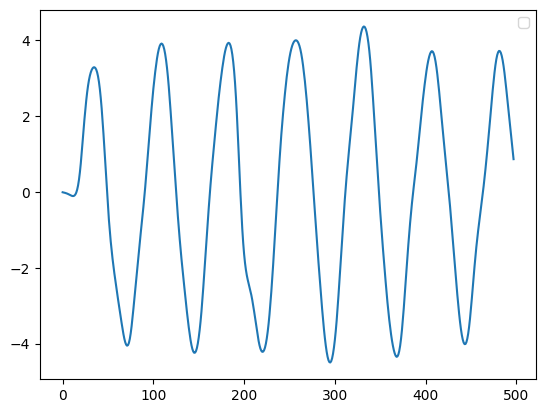

In [679]:
plt.plot(df['ux1'])



plt.legend()

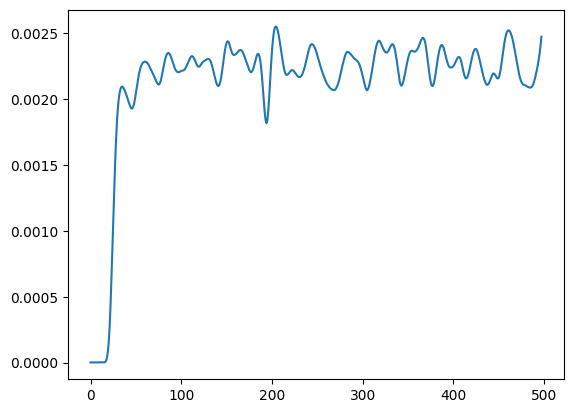

In [680]:
u = df['ux1'].to_numpy()**2 + df['ux2'].to_numpy()**2 + df['ux3'].to_numpy()**2 + df['uy1'].to_numpy()**2 + df['uy2'].to_numpy()**2 + df['uy3'].to_numpy()**2
p = df['x4'].to_numpy()

plt.figure()
plt.plot(u/100000, label='u')


In [681]:
df['x4'].mean()


np.float64(-0.0147036726358366)

/tmp/ipykernel_167060/2122015840.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


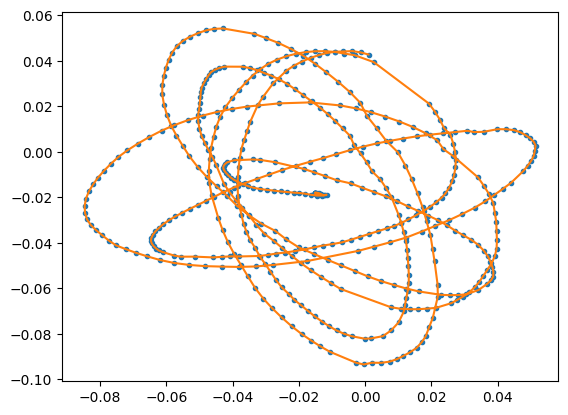

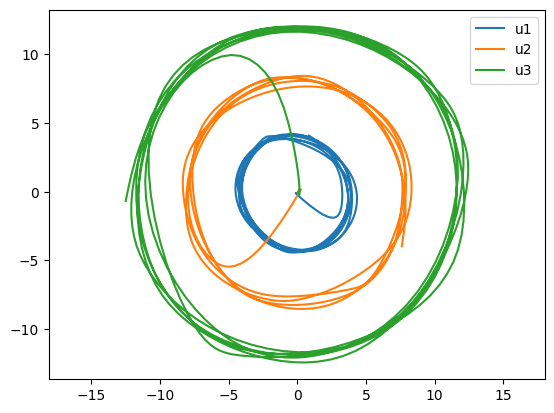

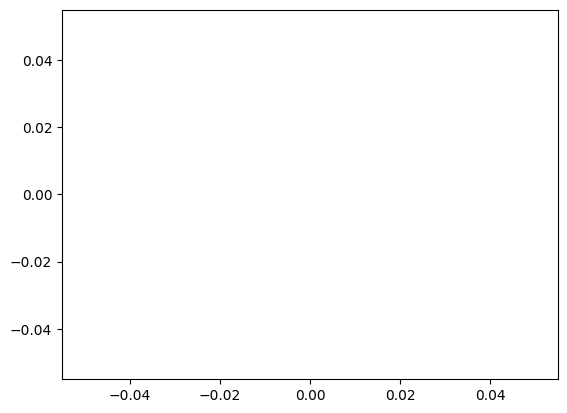

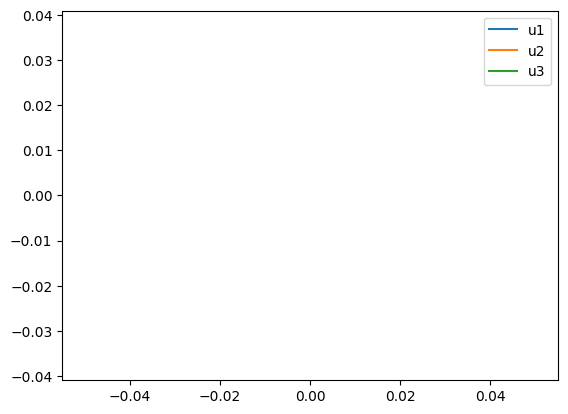

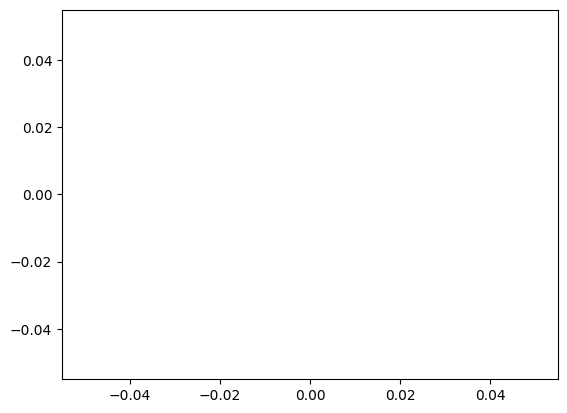

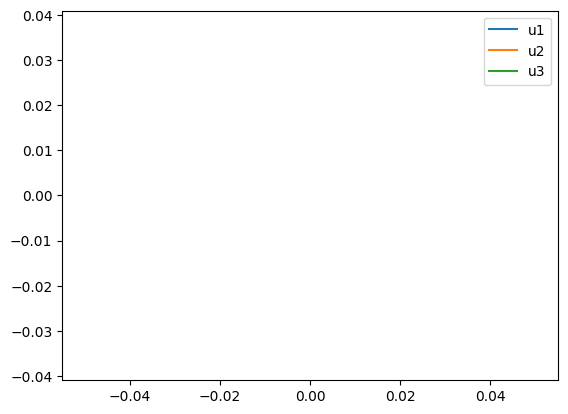

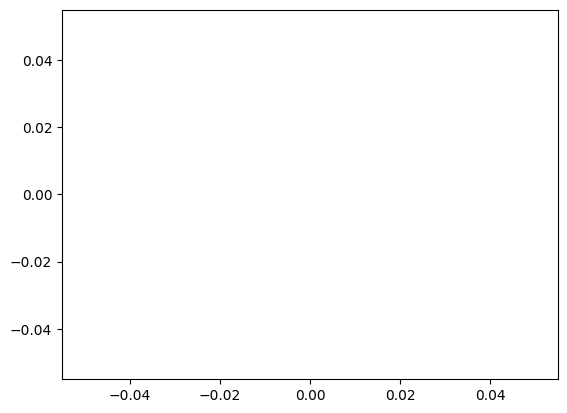

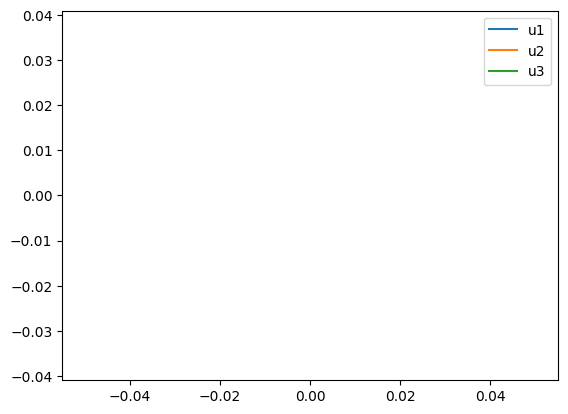

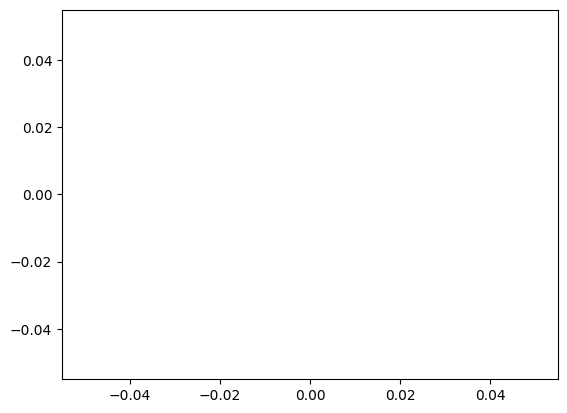

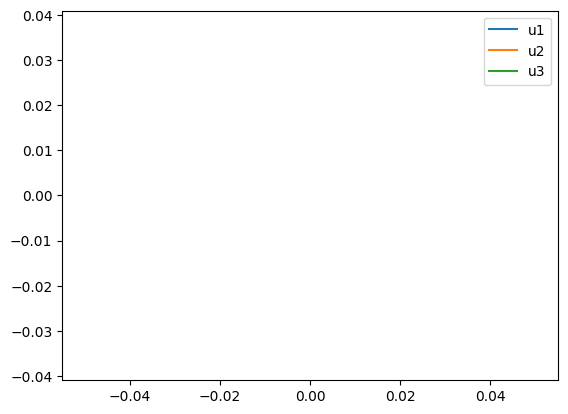

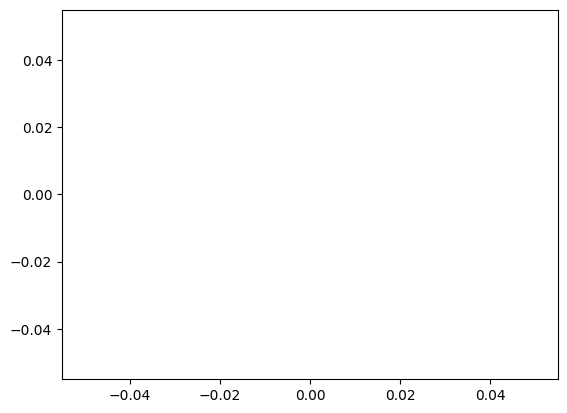

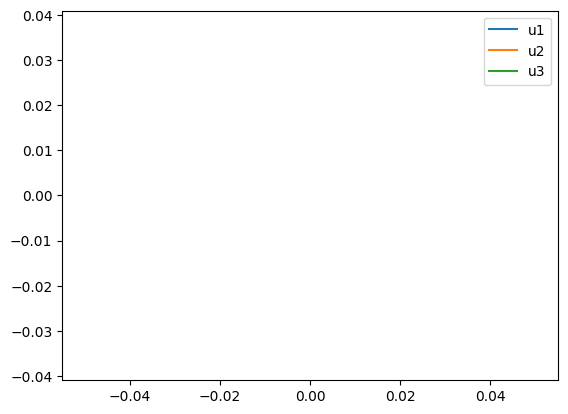

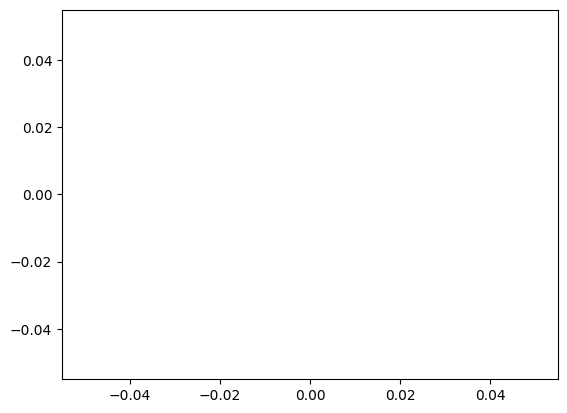

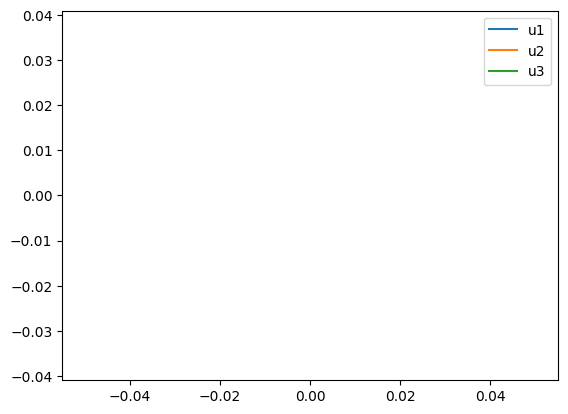

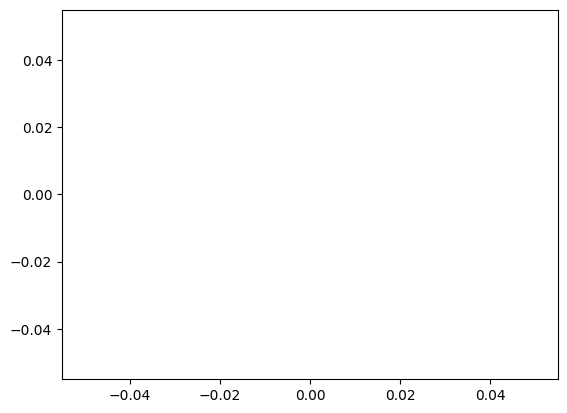

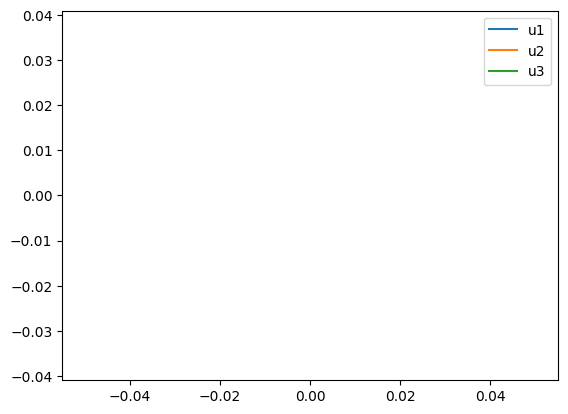

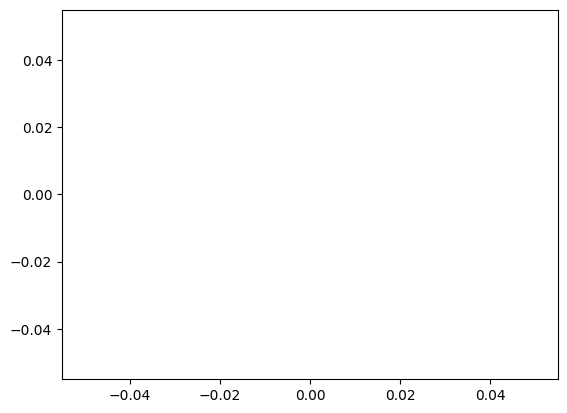

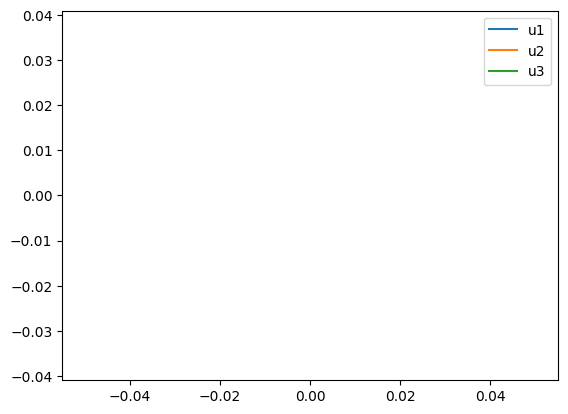

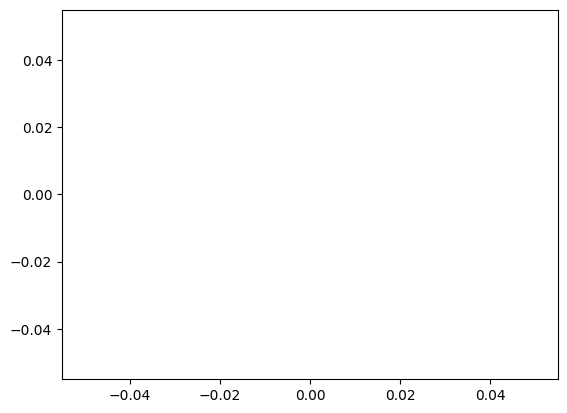

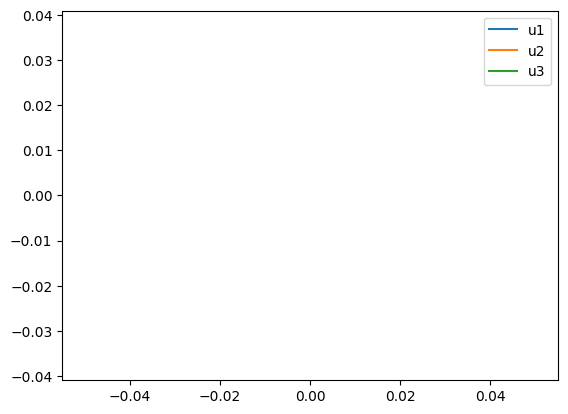

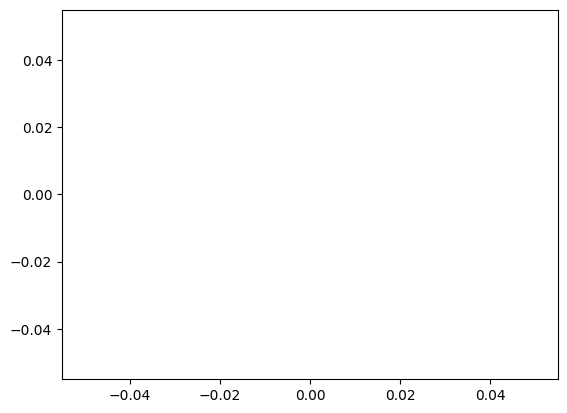

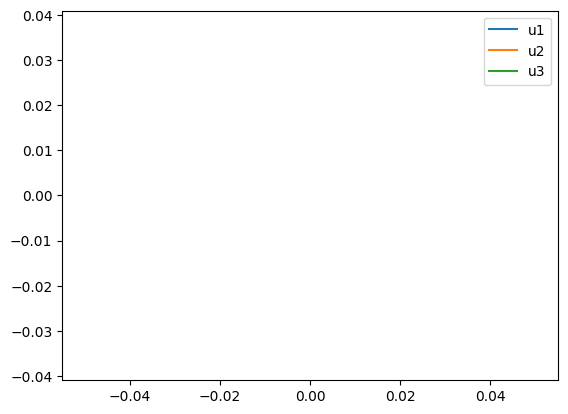

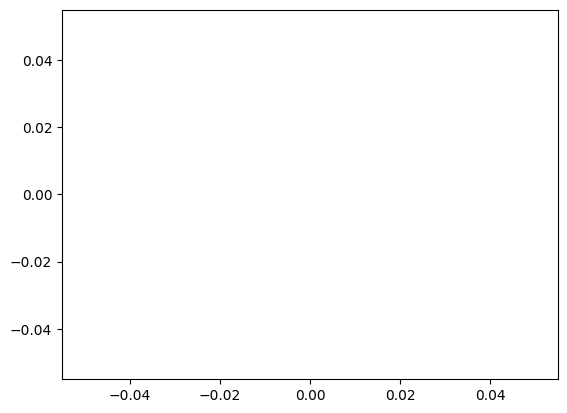

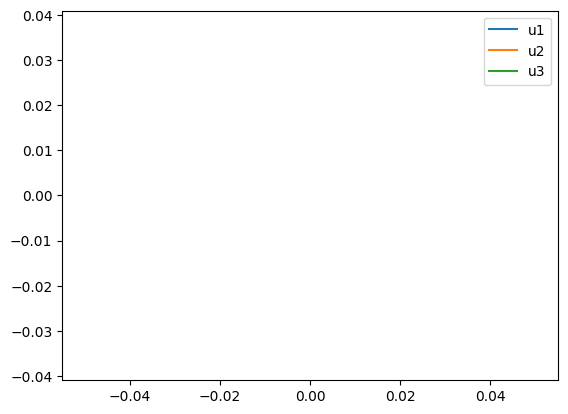

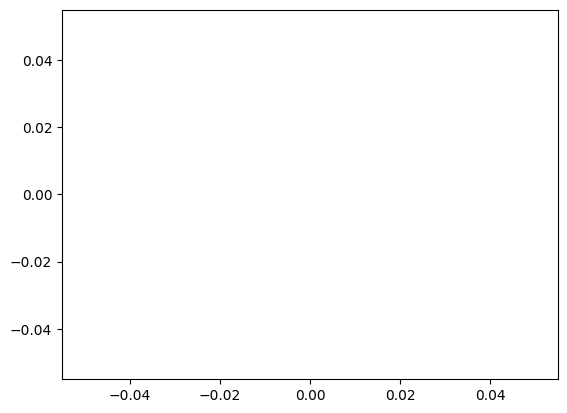

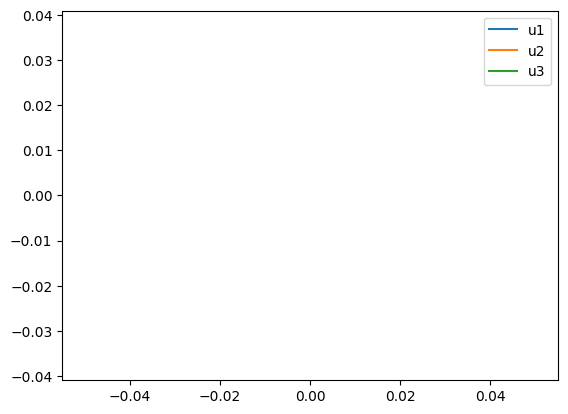

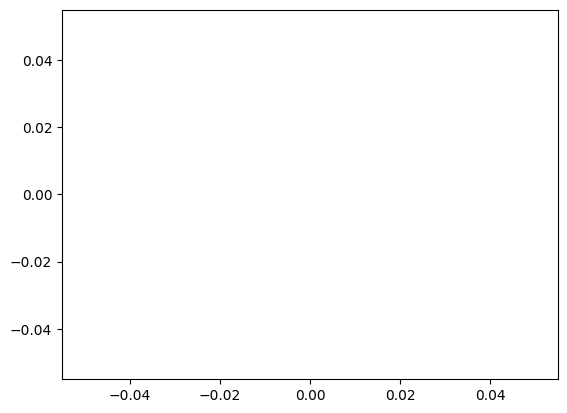

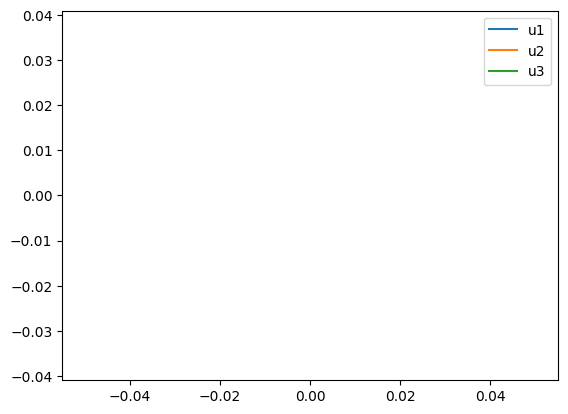

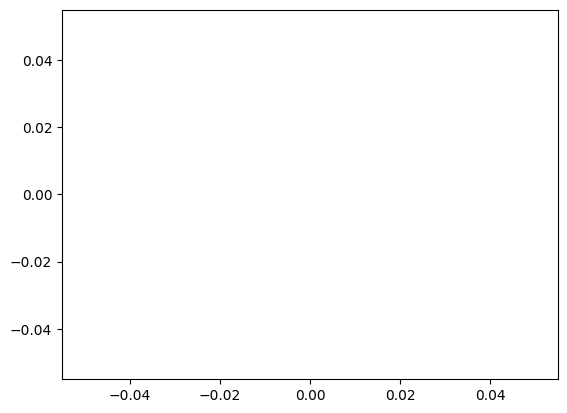

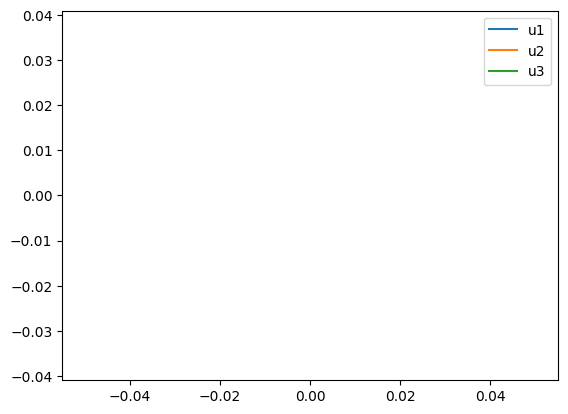

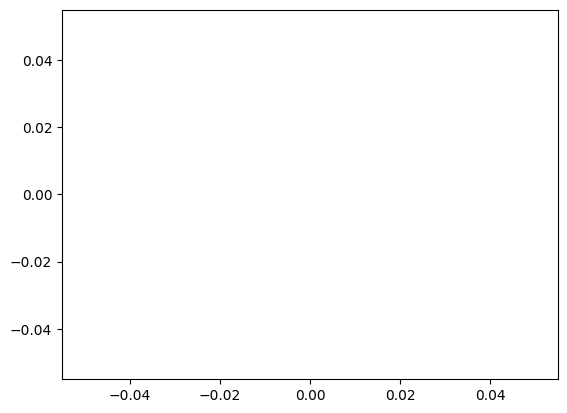

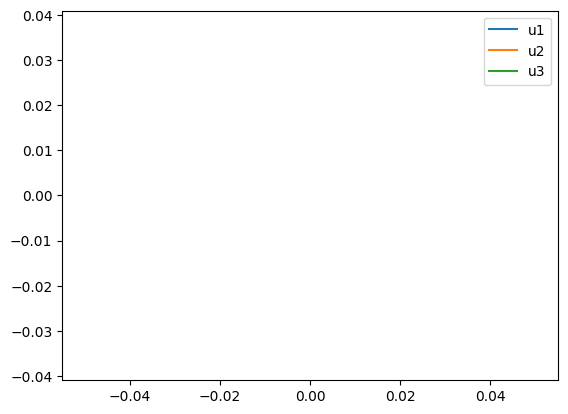

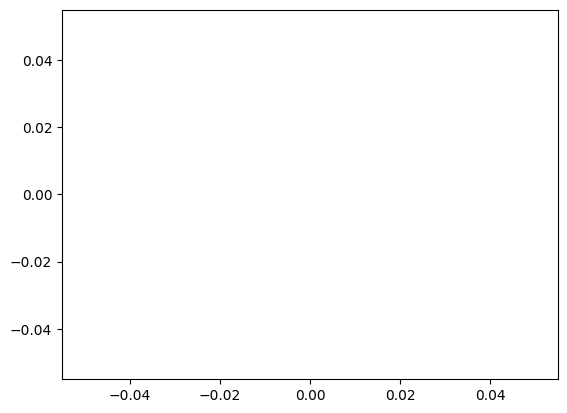

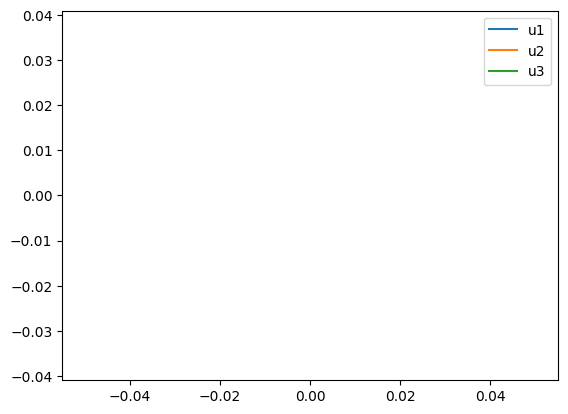

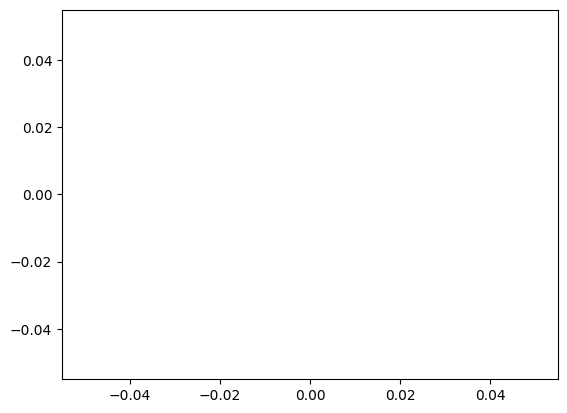

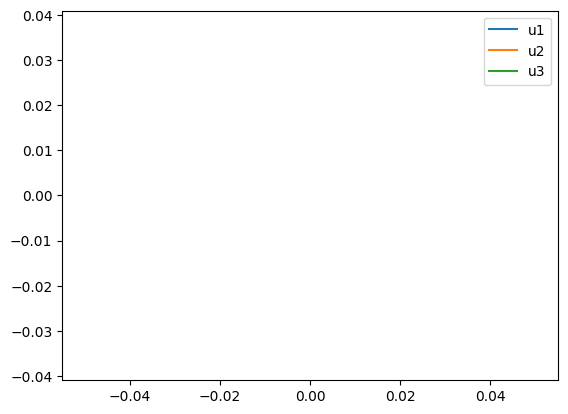

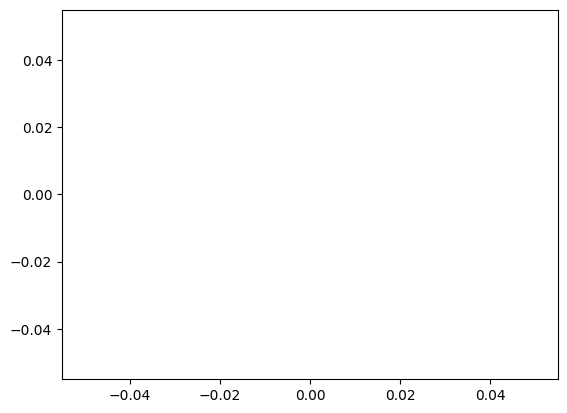

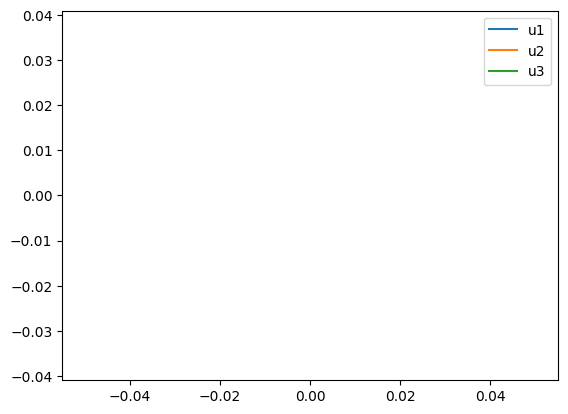

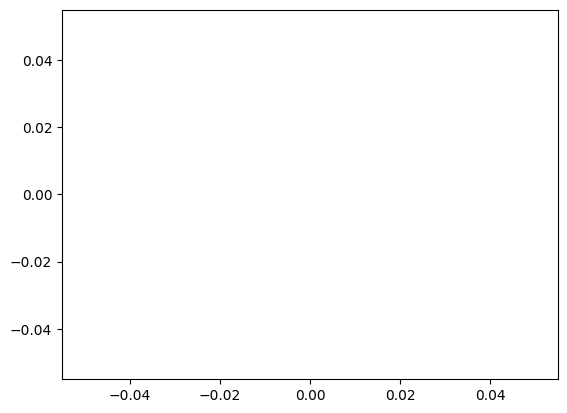

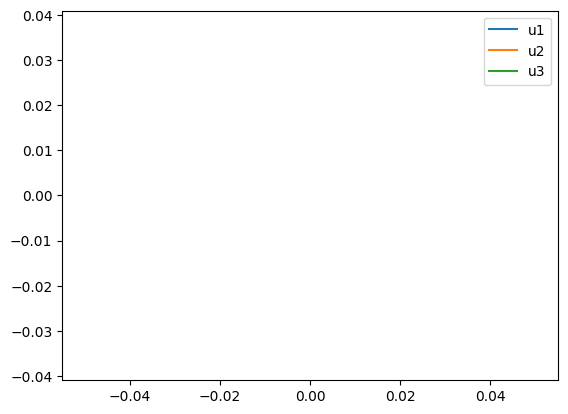

In [682]:
from datetime import datetime


for i in range(20):
    start = int(1000*i)
    delta = 500
    dfn = df.iloc[start:start+delta]
    dfn1 = df1.iloc[start:start+delta]

    plt.figure()
    plt.plot(dfn['x4'], dfn['y4'], label='x4', linestyle='None', marker='.')
    plt.plot(dfn['x4'], dfn['y4'], label='x4')
    plt.figure()
    plt.plot(dfn['ux1'], dfn['uy1'], label='u1')
    plt.plot(dfn['ux2'], dfn['uy2'], label='u2')
    plt.plot(dfn['ux3'], dfn['uy3'], label='u3')

    plt.axis('equal')
    plt.legend()



In [683]:
centers = []

for i in range(1, 5):
    centers.append([df[f'x{i}'].mean(), df[f'y{i}'].mean(), df[f'z{i}'].mean()])

In [684]:
c = np.array(centers)
print(c)

[[ 0.         -0.005       0.        ]
 [-0.00577417 -0.01128752 -0.10826359]
 [-0.00266321 -0.01829205 -0.2008408 ]
 [-0.01470367 -0.01796437 -0.31130414]]


In [685]:
c[:,2]

array([ 0.        , -0.10826359, -0.2008408 , -0.31130414])

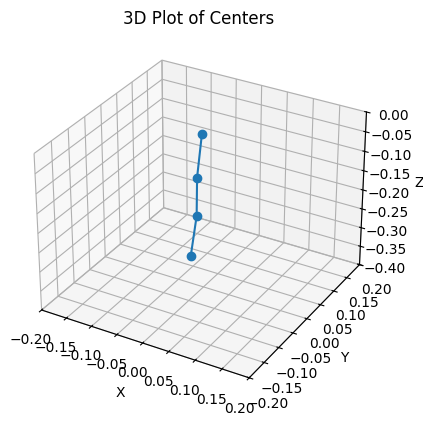

In [686]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(c[:, 0], c[:, 1], c[:, 2], marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Centers')

ax.set_xlim([-0.2, 0.2])
ax.set_ylim([-0.2, 0.2])
ax.set_zlim([-0.4, 0.0])
plt.show()

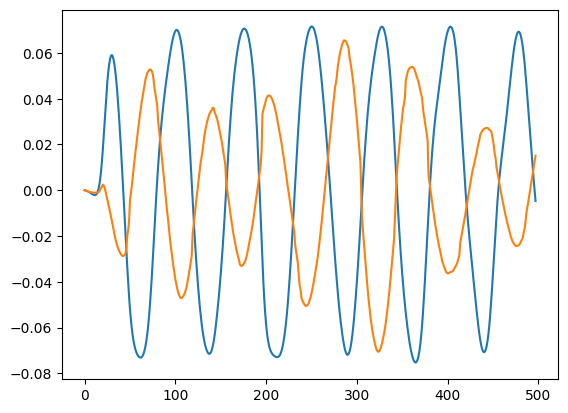

In [687]:
plt.plot(df['uy3']/1000 * 6 -(df['uy3'].iloc[0]/1000*6))

plt.plot(df['x4'] - df['x4'].iloc[0])


In [688]:
df['x4'] + df['vx4_new'] * 0.05 - df['x4_new']

0     -0.000629
1     -0.000494
2     -0.000520
3     -0.000452
4     -0.000454
         ...   
493    0.009656
494    0.011251
495    0.009933
496    0.009460
497    0.008555
Length: 498, dtype: float64